# Word2Vec
Aris Dwi Wahyudi - A11.2020.13070

# 01 Install & Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 02 Data Acquisition
Penjelasan Label 
* 0: SMS normal 
* 1: SMS fraud atau penipuan 
* 2: SMS promo

In [2]:
# Download dataset
# !wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/dataset_sms_spam_v1.csv

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/dataset_sms_spam_v1.csv')
data.head()

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


# 03 Text Preprocessing

In [4]:
'''
Disini, kita tidak banyak melakukan preprocessing karena kita tidak ingin mengubah makna (konteks) dari suatu kata yang menyusun suatu kalimat
'''
import re

def text_preprocessing(text):
    text = text.lower()                               # Mengubah teks menjadi lower case
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
    text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
    text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
    text = text.strip()                               # Menghapus whitespaces
    return text

In [5]:
%time data['clean_teks'] = data['teks'].apply(text_preprocessing)

# Perhatikan waktu komputasi ketika proses text preprocessing, bandingkan dengan langkah text preprocessing pada pertemuan sebelumnya

CPU times: total: 0 ns
Wall time: 19.5 ms


In [6]:
data.head()

,teks,label,clean_teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,promo beli paket flash mulai gb di my telkomse...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,gb hari hanya rp ribu spesial buat anda yang ...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,plg yth sisa kuota flash anda kb download myte...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,plg yth sisa kuota flash anda kb download myte...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,gb hari hanya rp ribu spesial buat anda yang ...


# 04 Word Embedding

## Word2Vec from Scratch

In [7]:
# Import library
import gensim

# Lihat versi Gensim yang digunakan
gensim.__version__

'4.3.0'

In [8]:
# Tokenize kata pada setiap kalimat
def tokenization(text):
    text = re.split('\W+', text)
    return text

sentences = data['clean_teks'].apply(lambda x: tokenization(x.lower()))
sentences

0       [promo, beli, paket, flash, mulai, gb, di, my,...
1       [gb, hari, hanya, rp, ribu, spesial, buat, and...
2       [plg, yth, sisa, kuota, flash, anda, kb, downl...
3       [plg, yth, sisa, kuota, flash, anda, kb, downl...
4       [gb, hari, hanya, rp, ribu, spesial, buat, and...
                              ...                        
1138    [yooo, sama, oke, nanti, aku, umumin, di, grup...
1139    [sebelumnya, ga, ad, nulis, kerudung, kirain, ...
1140                                [mba, mau, kirim, ya]
1141    [nama, beaok, bwrangkat, pagimau, cas, atay, t...
1142                    [no, bri, atas, nama, kamu, mana]
Name: clean_teks, Length: 1143, dtype: object

In [9]:
# Defenisikan parameter training Word2Vec

EMBEDDING_SIZE = 100    # Dimensi word vektor / neuron pada projection (hidden) layer
WINDOW_SIZE = 5         # Window size. Jarak maksimum antara kata saat ini dan yang diprediksi dalam sebuah
MIN_WORD  = 1           # Model akan mengabaikan semua kata dengan frekuensi total lebih rendah dari ini (opsional)
EPOCH = 10              # Jumlah iterasi (epoch).
SG = 1                  # Strategi algoritma pelatihan: 1 untuk skip-gram, 0 untuk CBOW
NEGATIVE = 5            # Negative sampling. Jika 0, negative sampling tidak digunakan

In [10]:
%%time 

# Proses training Word2Vec
from gensim.models import Word2Vec, FastText, KeyedVectors

model_word2vec = Word2Vec(sentences, vector_size=EMBEDDING_SIZE, sg=SG, min_count=MIN_WORD, window=WINDOW_SIZE, negative=NEGATIVE, epochs=EPOCH)

CPU times: total: 1.31 s
Wall time: 1.37 s


In [11]:
# Save Word2Vec sebagai full model
model_word2vec.save('myvec-word2vec-100.model')

In [12]:
# Save Word2Vec sebagai wordvectors. Hanya menyimpan kata & trained embeddingnya
word2vec_word_vectors = model_word2vec.wv
word2vec_word_vectors.save('myvec-word2vec-100.wordvectors')

In [13]:
# Cari nilai vektor dari kata tertentu
model_word2vec.wv['hadiah']

array([-0.48660162,  0.45826134,  0.13106194,  0.4567414 ,  0.2500769 ,
       -0.68256146,  0.0171375 ,  1.1611266 , -0.32750806, -0.2495465 ,
       -0.15931834, -0.63216066, -0.23941444,  0.40401733, -0.02136849,
       -0.7466259 , -0.29590487, -0.356032  ,  0.17639966, -0.7911925 ,
        0.37433657,  0.02243139,  0.24657086, -0.36126688,  0.12768264,
       -0.11737519, -0.13766478, -0.10841551, -0.28053704, -0.11759118,
        0.4872575 , -0.07227912,  0.45846638, -0.04736191, -0.20102456,
        0.35942233,  0.25855923, -0.06271601, -0.05845037, -0.62346035,
       -0.06465095, -0.4011392 , -0.5972701 , -0.06967101,  0.25118554,
       -0.19769154, -0.51652646,  0.04239699,  0.25901788,  0.28540865,
        0.2774896 , -0.38909313, -0.15323307,  0.25092766,  0.05116319,
        0.06674492,  0.2961521 , -0.19562633, -0.295413  ,  0.30495104,
        0.05477656,  0.4218769 ,  0.13789915, -0.32791883, -0.2900426 ,
        0.0861365 ,  0.05633566,  0.38235435, -0.4151749 ,  0.59

In [14]:
# Menemukan kata kata teratas yang paling mirip dari kata terentu
# Menghitung kesamaan dari vektor bobot proyeksi dari kata-kata yang diberikan dan vektor untuk setiap kata dalam model.

model_word2vec.wv.most_similar('hadiah')

[('mdptkan', 0.9957795143127441),
 ('pemenang', 0.9952720999717712),
 ('undian', 0.9948257803916931),
 ('mendptkan', 0.9945052266120911),
 ('terpilih', 0.9939708113670349),
 ('mdpt', 0.9939443469047546),
 ('mendapatkan', 0.9939181208610535),
 ('honda', 0.9931707382202148),
 ('dri', 0.9924952387809753),
 ('yaris', 0.9922382831573486)]

In [15]:
# Kata-kata yang ingin kita plot vektornya
word_list = ['hadiah', 'promosi', 'sms', 'malam', 'makan', 'telkomsel', 'selamat', 'juta', 'nama', 'duit', 'uang']

# daftar vektor dari kata-kata tersebut
word_vectors = np.array([model_word2vec.wv[w] for w in word_list])
print(word_vectors)

[[-0.48660162  0.45826134  0.13106194 ... -0.26146242 -0.02388105
  -0.09037447]
 [-0.04681499  0.08201749 -0.0076334  ... -0.12072749  0.08138275
  -0.03868169]
 [ 0.04842365  0.11179601 -0.04224401 ... -0.14092463  0.08658796
  -0.02059878]
 ...
 [-0.05388889  0.13174492 -0.03557195 ... -0.27755582  0.36754635
  -0.02395956]
 [-0.02881285  0.07764096 -0.02233923 ... -0.10233171  0.08496739
  -0.04099223]
 [-0.19512677  0.21675318  0.02183633 ... -0.24557476  0.04316547
  -0.07455323]]


In [16]:
# Reduksi dimensi vektor ke 2D menggunakan PCA
from sklearn.decomposition import PCA, KernelPCA

dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

In [17]:
# Lihat vektor hasil PCA (dari 5 dimensi menjadi 2 dimensi)
red_word_vectors

array([[ 1.9789364 ,  0.79313916],
       [-0.7431343 , -0.4511678 ],
       [-0.5661842 , -0.87712723],
       [-0.41042653, -0.06896748],
       [-0.7020116 ,  0.35089296],
       [ 0.06438362, -1.2087325 ],
       [ 1.4107448 ,  0.51081437],
       [ 0.6206155 , -0.78748727],
       [-1.1730256 ,  2.3679056 ],
       [-0.82264936, -0.56270474],
       [ 0.34275037, -0.0665657 ]], dtype=float32)

In [18]:
def plot(datas, labels, fc='yellow'):
    # plot the dots
    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(datas[:, 0], datas[:, 1], marker='o')

    # annotate labels
    for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
        plt.annotate(label, \
                    xy=(x, y), xytext=(-15, 15), \
                    textcoords='offset points', ha='right', va='bottom', \
                    bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
                    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.show()

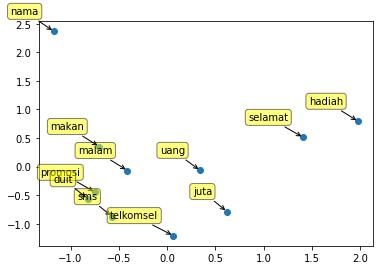

In [19]:
plot(red_word_vectors, word_list)